In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [9]:
#AUFGABE 2
#Werte
omega = np.array([642, 587.2, 544.6, 505.6, 464.2, 433.7, 401.4,])*2*np.pi/60 #Omega=2*pi*f in s^-1
d_omega = np.ones(7)*6*np.pi/60
time = np.array([0,130,240,360,480,600,720])#Zeit in s
d_time = np.ones(7)*5

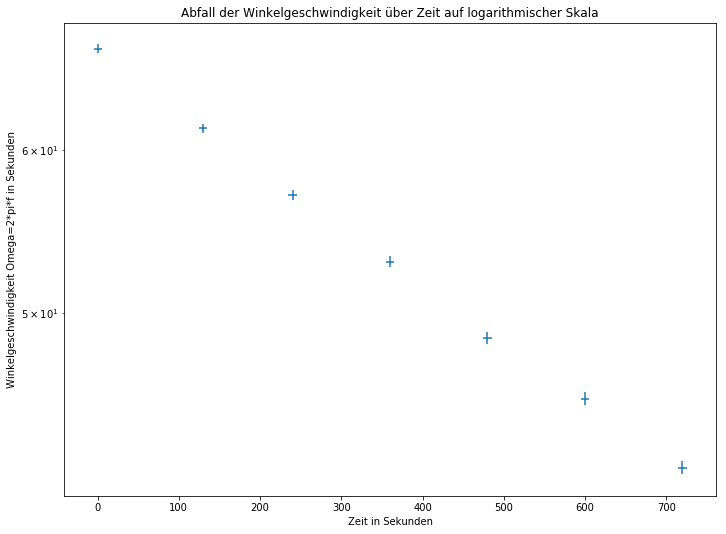

In [10]:
# plot
plt.errorbar(time, omega, xerr=d_time, yerr=d_omega, fmt='.', ms = 1)
plt.yscale('log') #Logarithmische Skalenteilung
plt.ylabel("Winkelgeschwindigkeit Omega=2*pi*f in Sekunden")
plt.xlabel("Zeit in Sekunden")
plt.title("Abfall der Winkelgeschwindigkeit über Zeit auf logarithmischer Skala")

#Speichern
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_1.pdf", format="pdf")

Dämpfungskonstante d =  0.0006545883480561323  +-  7.251110170506916e-06
Halbwertszeit =  1058.905467257884  +-  11.729876075613552
chi2 =  2.9379865643284013
chi2_red =  0.5875973128656803


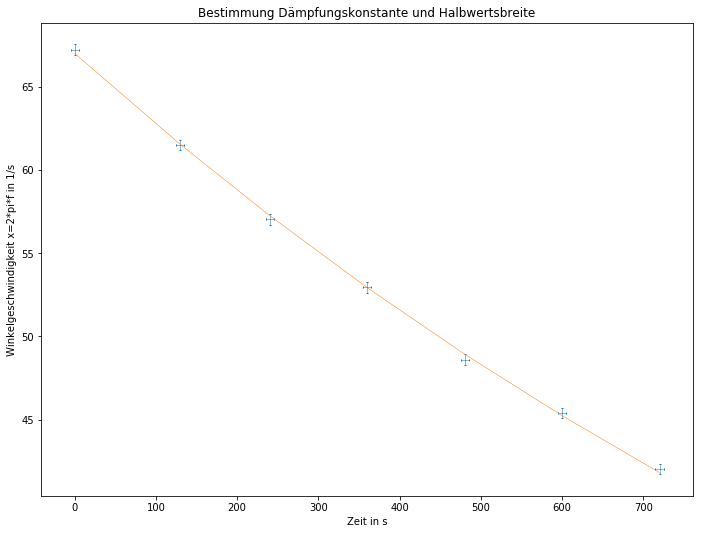

In [11]:
#Bestimmung der Dämpfung

#Definierer Dämpfungsfunktion
def dämpfung(t, d, A0):
    return A0*np.exp(-d*t)

#Funktionsfit
popt, pcov = curve_fit(dämpfung, time, omega, p0 = (0.001, 70) )

#Dämpfungskonstante
d = popt[0]
d_d = np.sqrt(pcov[0][0]) #Sigma=Wurzel der Varianz

print('Dämpfungskonstante d = ', d, ' +- ', d_d)

#Hablbertszeit
hwz = -np.log(1/2)/d
d_hwz = np.sqrt((np.log(1/2)*d_d/d**2)**2)

print('Halbwertszeit = ', hwz, ' +- ', d_hwz)

#Chi Quadrat Test

chi2_ = np.sum((dämpfung(time, *popt)-omega)**2/d_omega**2)
dof = len(time)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

#Plot
plt.errorbar(time, omega, yerr=d_omega, xerr=d_time, fmt='.', ms =0.5, elinewidth = 0.5, capthick =1, capsize =1)
plt.plot(time, dämpfung(time, *popt), linewidth=0.5)
plt.title('Bestimmung Dämpfungskonstante und Halbwertsbreite')
plt.ylabel('Winkelgeschwindigkeit x=2*pi*f in 1/s')
plt.xlabel('Zeit in s')

#Speichern
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_2.pdf", format="pdf")







Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 64.8524676473449 +- 0.11735841630564796
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 45.92402536785947 +- 0.11356057223737866
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 36.39185446319297 +- 0.11227653720209019
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 30.049788002683922 +- 0.11167614707359699
Steigung s =  1.093530517287082  +-  0.015361412260295654
Trägheitsmoment Iz =  0.002522553888348007  +-  3.5435673740472885e-05
chi2 =  1.5117990860718389
Anz der Freiheitsgrade = 3
chi2 Reduziert =  0.503933028690613


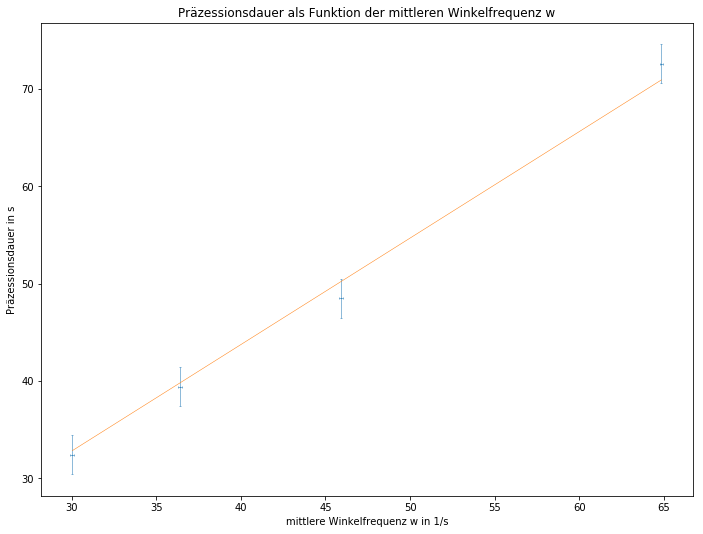

In [18]:
#AUFGABE 3B
#Bestimmung der mittleren Frequenzen
# (i) 1m bei d=15cm

#Eingabe der Werte (Startwert und Zeit)
omega_A = np.array([634,445.5,352,290])*np.pi/30 #omega=2*pi*f in Sekunden^-1
d_omega_A = np.ones(4)*np.pi/20 #Fehler von Omega +-3 min^-1 (umgerechnet)
time = np.array([72.56,48.48,39.42,32.43])#Präzessionszeit in Sekunden
d_time = np.ones(4)*2 #Fehler der PZeit 2 Sekunden


#Setze Werte in das Däpmfungsfit ein (Zeit, Dämpfungskonstante, Startwert)
omega_E = dämpfung(time, d, omega_A) 

#Berechne die Drehfrequenz am Ende der Präzessionsbewegung

#Fehlerrechnung
f1 = np.exp(-d*time)*d_omega_A #Fehler des Anfangswerts
f2 = omega_A*time*np.exp(-d*time)*d_d #Fehler der Dämpfungskonstanten
f3 = omega_A*d*np.exp(-d*time)*d_time #Fehler der Zeit
d_omega_E = np.sqrt(f1**2+f2**2+f3**2) #Gaußsche Fehlerfortpflanzung

#Berechnung des Mittelwerts
m_omega = 0.5*(omega_A+omega_E)
#Fehler des Mittelwerts
d_m_omega = np.sqrt((0.5*d_omega_A)**2+(0.5*d_omega_E)**2)

for i in range(len(omega_A)):
    print('Mittlere Drehfrequenz des jeweiligen Tabelleneintrags=',m_omega[i], '+-',d_m_omega[i] )

#Plot der Präzessionsdauer in Abhängigkeit der mittleren Frequenzen

#Definition der linearen Fitfunktion
def line(x, m):
    return m*x

#Kurvenfit
popt, pcov = curve_fit(line, m_omega, time)

#Berechnung der Kurvensteigung
s = popt[0]
d_s = np.sqrt(pcov[0][0]) #Sigma=Wurzel der Varianz
print('Steigung s = ', s, ' +- ', d_s )

#Berechnung des Trägheitsmoments

#Eingabe der Werte
m = 9.85e-3
l = 0.15

g = 9.80984
d_g = 2e-5

#Berechnung
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)

#Grafikplot

plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Präzessionsdauer als Funktion der mittleren Winkelfrequenz w')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Winkelfrequenz w in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_3(i).pdf", format="pdf")

# Berechnung des Chi^2

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: Anz. der Freitheitsgrade
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print ("Anz der Freiheitsgrade =", dof)
print("chi2 Reduziert = ", chi2_red)

Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 62.88745838645991 +- 0.1171256013672436
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 49.59434145918999 +- 0.11438505969043947
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 34.41418864079483 +- 0.11213832433889345
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 27.6554933344317 +- 0.11159756996055303
Steigung s =  0.8476557532360129  +-  0.05350527929558189
Trägheitsmoment Iz =  0.0026071606690481436  +-  0.00016456782049328091
chi2 =  17.957565821037086
chi2 Reduziert =  5.985855273679029


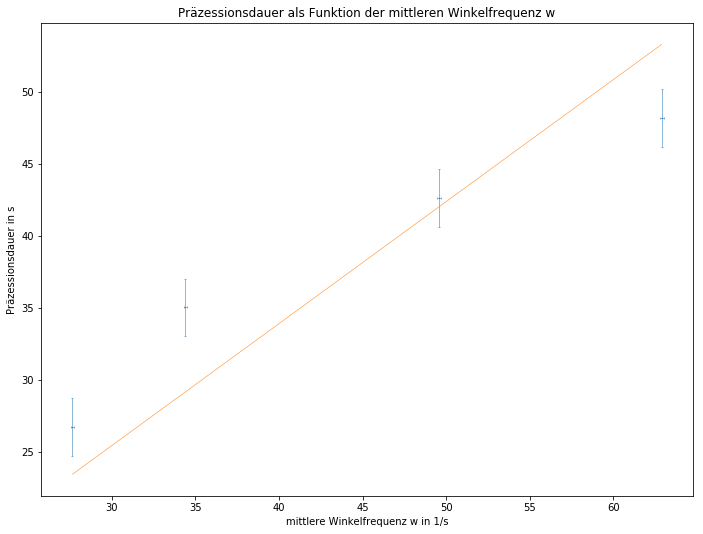

In [13]:
# (ii) 1m bei d=20cm

#Eingabe der Werte (Startwert und Zeit)
omega_A = np.array([610,480.2,332.4,266.4])*np.pi/30 #omega=2*pi*f in Sekunden^-1
d_omega_A = np.ones(4)*np.pi/20 #Fehler von Omega +-3 min^-1 (umgerechnet)
time = np.array([48.18,42.64,35.04,26.72])#Präzessionszeit in Sekunden
d_time = np.ones(4)*2 #Fehler der PZeit 2 Sekunden


#Setze Werte in das Däpmfungsfit ein (Zeit, Dämpfungskonstante, Startwert)
omega_E = dämpfung(time, d, omega_A) 

#Berechne die Drehfrequenz am Ende der Präzessionsbewegung

#Fehlerrechnung
f1 = np.exp(-d*time)*d_omega_A #Fehler des Anfangswerts
f2 = omega_A*time*np.exp(-d*time)*d_d #Fehler der Dämpfungskonstanten
f3 = omega_A*d*np.exp(-d*time)*d_time #Fehler der Zeit
d_omega_E = np.sqrt(f1**2+f2**2+f3**2) #Gaußsche Fehlerfortpflanzung

#Berechnung des Mittelwerts
m_omega = 0.5*(omega_A+omega_E)
#Fehler des Mittelwerts
d_m_omega = np.sqrt((0.5*d_omega_A)**2+(0.5*d_omega_E)**2)

for i in range(len(omega_A)):
    print('Mittlere Drehfrequenz des jeweiligen Tabelleneintrags=',m_omega[i], '+-',d_m_omega[i] )

#Plot der Präzessionsdauer in Abhängigkeit der mittleren Frequenzen

#Definition der linearen Fitfunktion
def line(x, m):
    return m*x

#Kurvenfit
popt, pcov = curve_fit(line, m_omega, time)

#Berechnung der Kurvensteigung
s = popt[0]
d_s = np.sqrt(pcov[0][0]) #Sigma=Wurzel der Varianz
print('Steigung s = ', s, ' +- ', d_s )

#Berechnung des Trägheitsmoments

#Eingabe der Werte
m = 9.85e-3
l = 0.20

g = 9.80984
d_g = 2e-5

#Berechnung
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)

#Grafikplot

plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Präzessionsdauer als Funktion der mittleren Winkelfrequenz w')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Winkelfrequenz w in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_3(ii).pdf", format="pdf")

# Berechnung des Chi^2

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: Anz. der Freitheitsgrade
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2 Reduziert = ", chi2_red)



Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 66.66070588964752 +- 0.11804979160890741
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 60.10809398010948 +- 0.1165815368295889
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 46.58960556064282 +- 0.11403296607755908
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 34.56936666803963 +- 0.11242382171488821
Steigung s =  0.7293575397513323  +-  0.012111076297188288
Trägheitsmoment Iz =  0.003364960865399698  +-  5.587561088211534e-05
chi2 =  1.256547710744841
chi2 reduziert =  0.418849236914947


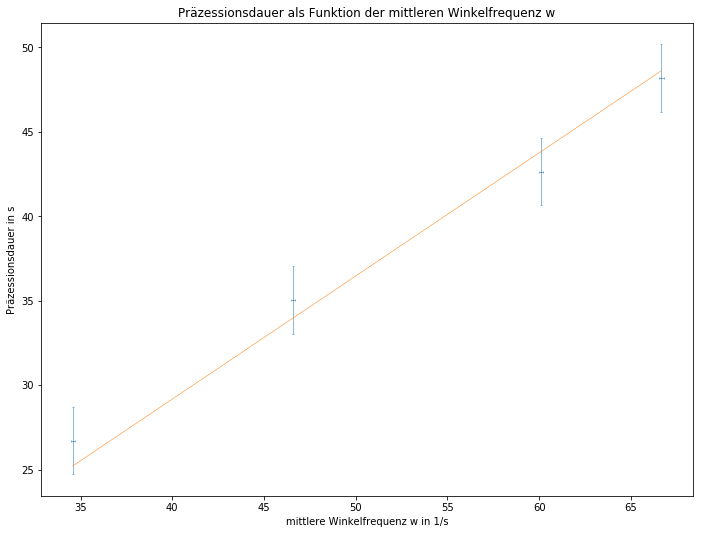

In [14]:
# (iii) 2m bei d=15cm

#Eingabe der Werte (Startwert und Zeit)
omega_A = np.array([646.6,582,450,333])*np.pi/30 #omega=2*pi*f in Sekunden^-1
d_omega_A = np.ones(4)*np.pi/20 #Fehler von Omega +-3 min^-1 (umgerechnet)
time = np.array([48.18,42.64,35.04,26.72])#Präzessionszeit in Sekunden
d_time = np.ones(4)*2 #Fehler der PZeit 2 Sekunden


#Setze Werte in das Däpmfungsfit ein (Zeit, Dämpfungskonstante, Startwert)
omega_E = dämpfung(time, d, omega_A) 

#Berechne die Drehfrequenz am Ende der Präzessionsbewegung

#Fehlerrechnung
f1 = np.exp(-d*time)*d_omega_A #Fehler des Anfangswerts
f2 = omega_A*time*np.exp(-d*time)*d_d #Fehler der Dämpfungskonstanten
f3 = omega_A*d*np.exp(-d*time)*d_time #Fehler der Zeit
d_omega_E = np.sqrt(f1**2+f2**2+f3**2) #Gaußsche Fehlerfortpflanzung

#Berechnung des Mittelwerts
m_omega = 0.5*(omega_A+omega_E)
#Fehler des Mittelwerts
d_m_omega = np.sqrt((0.5*d_omega_A)**2+(0.5*d_omega_E)**2)

for i in range(len(omega_A)):
    print('Mittlere Drehfrequenz des jeweiligen Tabelleneintrags=',m_omega[i], '+-',d_m_omega[i] )

#Plot der Präzessionsdauer in Abhängigkeit der mittleren Frequenzen

#Definition der linearen Fitfunktion
def line(x, m):
    return m*x

#Kurvenfit
popt, pcov = curve_fit(line, m_omega, time)

#Berechnung der Kurvensteigung
s = popt[0]
d_s = np.sqrt(pcov[0][0]) #Sigma=Wurzel der Varianz
print('Steigung s = ', s, ' +- ', d_s )

#Berechnung des Trägheitsmoments

#Eingabe der Werte
m = 2*9.85e-3
l = 0.15

g = 9.80984
d_g = 2e-5

#Berechnung
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)

#Grafikplot

plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Präzessionsdauer als Funktion der mittleren Winkelfrequenz w')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Winkelfrequenz w in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_3(iii).pdf", format="pdf")

# Berechnung des Chi^2

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: Anz. der Freitheitsgrade
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2 reduziert = ", chi2_red)





Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 68.3469454685243 +- 0.11862426465438453
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 55.88282588449762 +- 0.11594566558366785
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 46.09218981514592 +- 0.11418786436317824
Mittlere Drehfrequenz des jeweiligen Tabelleneintrags= 33.818528229065706 +- 0.11256683623051546
Steigung s =  0.5669663997040939  +-  0.006791312166418422
Trägheitsmoment Iz =  0.0034876717165836886  +-  4.1776492781152304e-05
chi2 =  0.38266359099581626
chi2 reduziert =  0.12755453033193875


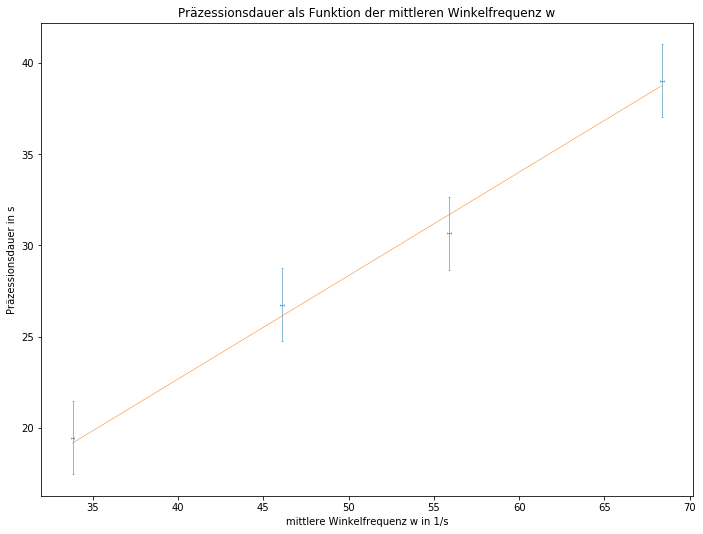

In [15]:
# (iv) 2m bei d=20cm

#Eingabe der Werte (Startwert und Zeit)
omega_A = np.array([661,539,444,325])*np.pi/30 #omega=2*pi*f in Sekunden^-1
d_omega_A = np.ones(4)*np.pi/20 #Fehler von Omega +-3 min^-1 (umgerechnet)
time = np.array([39.02,30.68,26.74,19.46])#Präzessionszeit in Sekunden
d_time = np.ones(4)*2 #Fehler der PZeit 2 Sekunden


#Setze Werte in das Däpmfungsfit ein (Zeit, Dämpfungskonstante, Startwert)
omega_E = dämpfung(time, d, omega_A) 

#Berechne die Drehfrequenz am Ende der Präzessionsbewegung

#Fehlerrechnung
f1 = np.exp(-d*time)*d_omega_A #Fehler des Anfangswerts
f2 = omega_A*time*np.exp(-d*time)*d_d #Fehler der Dämpfungskonstanten
f3 = omega_A*d*np.exp(-d*time)*d_time #Fehler der Zeit
d_omega_E = np.sqrt(f1**2+f2**2+f3**2) #Gaußsche Fehlerfortpflanzung

#Berechnung des Mittelwerts
m_omega = 0.5*(omega_A+omega_E)
#Fehler des Mittelwerts
d_m_omega = np.sqrt((0.5*d_omega_A)**2+(0.5*d_omega_E)**2)

for i in range(len(omega_A)):
    print('Mittlere Drehfrequenz des jeweiligen Tabelleneintrags=',m_omega[i], '+-',d_m_omega[i] )

#Plot der Präzessionsdauer in Abhängigkeit der mittleren Frequenzen

#Definition der linearen Fitfunktion
def line(x, m):
    return m*x

#Kurvenfit
popt, pcov = curve_fit(line, m_omega, time)

#Berechnung der Kurvensteigung
s = popt[0]
d_s = np.sqrt(pcov[0][0]) #Sigma=Wurzel der Varianz
print('Steigung s = ', s, ' +- ', d_s )

#Berechnung des Trägheitsmoments

#Eingabe der Werte
m = 2*9.85e-3
l = 0.20

g = 9.80984
d_g = 2e-5

#Berechnung
Iz = g * m * l * s / (2 * np.pi)
d_Iz = np.sqrt((m*l*s*d_g/(2*np.pi))**2+(m*l*g*d_s/(2*np.pi))**2)
print('Trägheitsmoment Iz = ', Iz, ' +- ', d_Iz)

#Grafikplot

plt.errorbar(m_omega, time, yerr=d_time, xerr=d_m_omega, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(m_omega, line(m_omega, *popt), linewidth=0.5)
plt.title('Präzessionsdauer als Funktion der mittleren Winkelfrequenz w')
plt.ylabel('Präzessionsdauer in s')
plt.xlabel('mittlere Winkelfrequenz w in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_3(iv).pdf", format="pdf")

# Berechnung des Chi^2

chi2_ = np.sum((line(m_omega, *popt)-time)**2/d_time**2)
dof = len(m_omega)-1 #dof: Anz. der Freitheitsgrade
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2 reduziert = ", chi2_red)





Steigung m =  1.0003004723493283  +-  0.01411795439926075
chi2 =  3.5022782774991033
Anz Freiheitsgrade = 9
chi2 reduziert =  0.3891420308332337


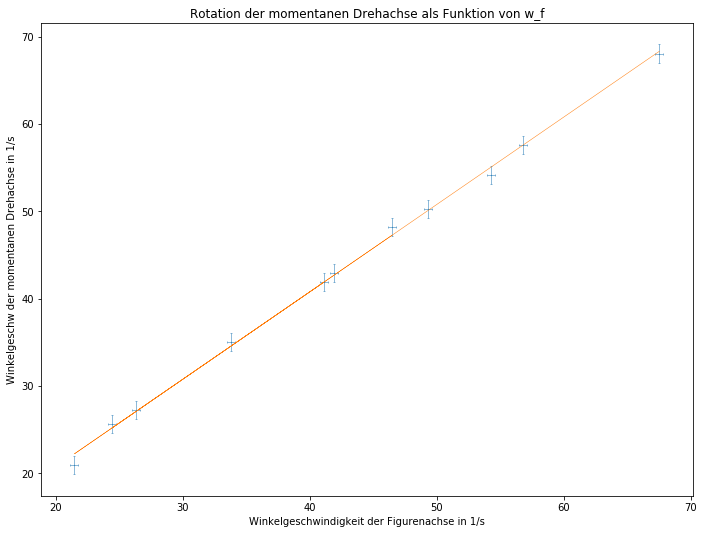

In [19]:
#AUFGABE 4B

#Gemessenen Werte
omega_f = np.array([645,542.4,518,471,400,323,251,233,393,205,444])*np.pi/30 #omega_f=2*pi*f in s^-1
d_omega_f = np.ones(11)*np.pi/10 #Fehler 3 min^-1
Omega = np.array([650,550,517.5,480,410,335,260,245,400,200,460])*np.pi/30
d_Omega = np.ones(11)*np.pi/3 #Fehler = 10 min^-1

#Kurvenfit
def line2(x, m, c):
    return m*x+c

popt, pcov = curve_fit(line2, omega_f, Omega)
s = popt[0]
d_s = np.sqrt(pcov[0][0])

print('Steigung m = ', s, ' +- ', d_s)

#Berechnung des Chi^2
chi2_ = np.sum((line2(omega_f, *popt)-Omega)**2/d_Omega**2)
dof = len(omega_f)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print ("Anz Freiheitsgrade =", dof)
print("chi2 reduziert = ", chi2_red)

#Plot
plt.errorbar(omega_f, Omega, yerr=d_Omega, xerr=d_omega_f, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(omega_f, line2(omega_f, *popt), linewidth=0.5)
plt.title('Rotation der momentanen Drehachse als Funktion von w_f')
plt.ylabel('Winkelgeschw der momentanen Drehachse in 1/s')
plt.xlabel('Winkelgeschwindigkeit der Figurenachse in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_4.pdf", format="pdf")



Steigung m =  1.0381465353803383  +-  0.03880938510228346
chi2 =  65.27278594689109
Anz. der Freiheitsrade = 8
chi2 reduziert =  8.159098243361386


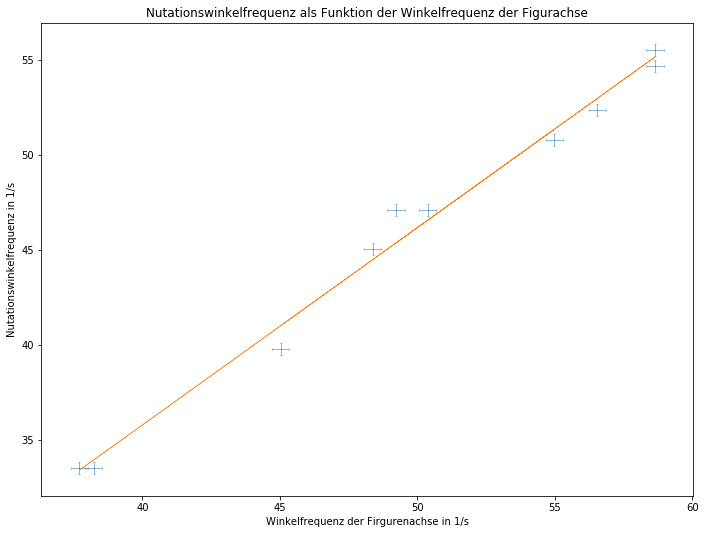

In [20]:
#AUFGABE 5

#Messwerte
omega_f = np.array([430,481,540,560,360,365,462,525,470,560])*np.pi/30
d_omega_f = np.ones(10)*np.pi/10 #Fehler = 3 min^-1
omega_n = np.array([380,450,500,530,320,320,430,485,450,522])*np.pi/30
d_omega_n = np.ones(10)*np.pi/10 #Fehler = 3 min^-1

#Kurvenfit
popt, pcov = curve_fit(line2, omega_f, omega_n)
s = popt[0]
d_s = np.sqrt(pcov[0][0])

print('Steigung m = ', s, ' +- ', d_s)

#Chi^2
chi2_ = np.sum((line2(omega_f, *popt)-omega_n)**2/d_omega_n**2)
dof = len(omega_f)-2 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print ("Anz. der Freiheitsrade =", dof)
print("chi2 reduziert = ", chi2_red)

#Plot
plt.errorbar(omega_f, omega_n, yerr=d_omega_n, xerr=d_omega_f, fmt='.', ms =0.5, elinewidth = 0.5, capthick =0.5, capsize =1)
plt.plot(omega_f, line2(omega_f, *popt), linewidth=0.5)
plt.title('Nutationswinkelfrequenz als Funktion der Winkelfrequenz der Figurachse')
plt.ylabel('Nutationswinkelfrequenz in 1/s')
plt.xlabel('Winkelfrequenz der Firgurenachse in 1/s')
fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/KREISEL/Diagramm_5.pdf", format="pdf")